In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import train_test_split

<h3> GD Classifier </h3>

In [6]:
# Load data
X,y = datasets.make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train[:5], y_train[:5], np.unique(y_train)

(array([[-0.27401286, -1.12456079, -0.78007008,  1.73315839, -1.57361347,
         -0.71382457, -1.32128607, -1.33903259,  1.10376249, -1.64285664,
         -0.48243559, -1.19045207, -0.2297252 ,  0.0756853 , -1.14676469,
         -1.34843247, -0.39072331,  0.71479455,  0.03436459, -0.24610632],
        [-0.06599147,  0.55577322, -0.58441197,  1.54754594, -1.57938685,
         -0.57878001, -1.73521073,  2.96360737, -0.34485156, -1.55703568,
          0.88412811, -0.99744307, -0.02065274,  0.02580777, -1.30382351,
         -1.09244381,  0.10065219, -0.60563782, -0.01535059,  0.13600122],
        [-1.93547742,  0.83068151, -1.82004569,  3.21234042, -1.52399369,
         -1.79123504, -1.10947096,  0.36400349,  1.07214726, -2.32491383,
         -0.80944815, -2.72993587, -1.89968591,  0.47403447,  0.1106654 ,
         -3.39076772, -2.24794227,  0.87727793,  0.43150821, -3.29856572],
        [-0.07762434,  0.80086837,  0.44078573,  1.15928185, -1.1556352 ,
         -0.44281465, -1.39706512, 

In [7]:
clf = ensemble.GradientBoostingClassifier(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=400)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.98

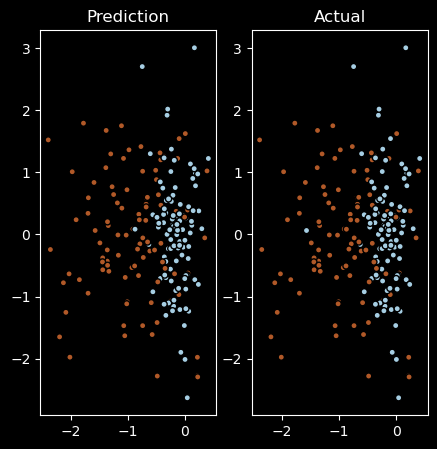

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolor='k', s=20)
ax[0].set_title('Prediction')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=20)
ax[1].set_title('Actual')
plt.show()

In [29]:
from sklearn.metrics import r2_score
X,y = datasets.make_regression(n_samples=1000, n_features=20, n_informative=2, noise=10, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='squared_error')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.969246348223449

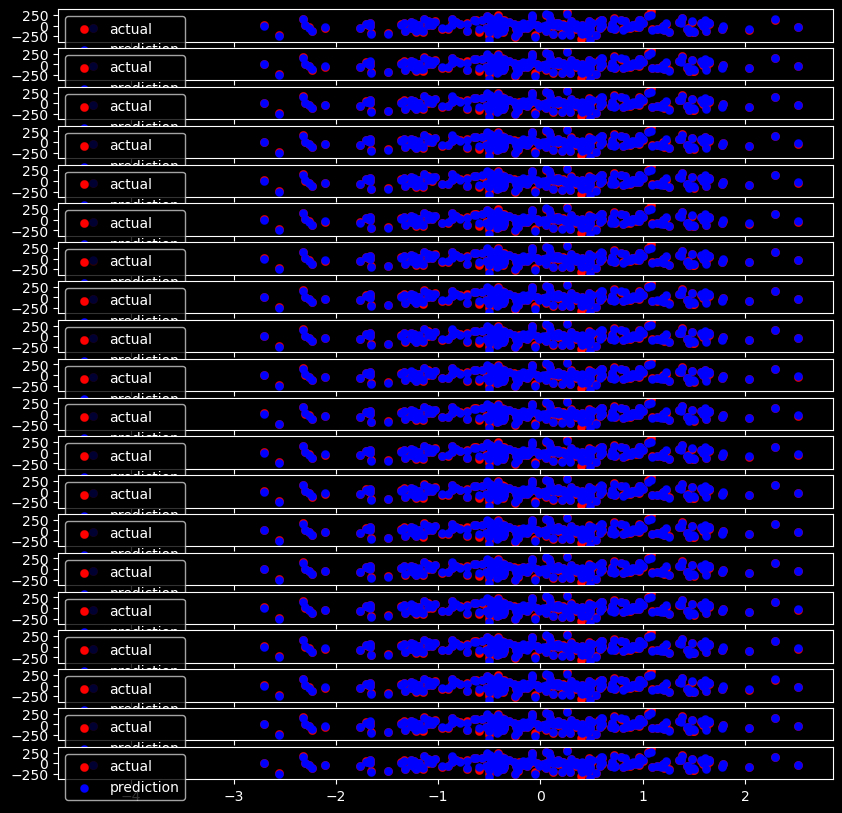

In [47]:
n_features = X.shape[1]
fig, ax = plt.subplots(n_features,1,figsize=(10,10))
for i in range(n_features):
    ax[i].scatter(X_test[:, 0], y_test, color='red', linewidth=0.2, label="actual")
    ax[i].scatter(X_test[:, 0], y_pred, color='blue', linewidth=0.1, label="prediction")
    ax[i].legend()
plt.show()

<h2> Random forest vs Historgram (Boosting) </h2>

In [50]:
X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [54]:
from sklearn.model_selection import KFold
names = ['RandomForest', 'GradientBoosting']

models = [
    ensemble.RandomForestRegressor(n_estimators=100, random_state=4),
    ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='huber', random_state=4)
]

param_grids = {
    names[0]: {"n_estimators": [10, 20, 50, 100]},
    names[1]: {"max_iter": [10, 20, 50, 100, 300, 500]},
}

cv = KFold(n_splits=5, shuffle=True, random_state=4)

In [55]:
import time
times = {names[0]: [], names[1]: []}
scores = {names[0]: [], names[1]: []}

for name, model in zip(names, models):
    for train_index, test_index in cv.split(X_train):
        start = time.time()
        
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        scores[name].append(r2_score(y_test_cv, y_pred))
        times[name].append(time.time() - start)

scores, times

({'RandomForest': [0.8036144663872329,
   0.8081448579632038,
   0.8011023814332776,
   0.8127154697225651,
   0.7955769691214917],
  'GradientBoosting': [0.8414176428496949,
   0.8350936483561705,
   0.8350397593349488,
   0.8445045487508189,
   0.8251651574531882]},
 {'RandomForest': [6.028001070022583,
   6.040178060531616,
   6.0514280796051025,
   6.002677917480469,
   6.077988862991333],
  'GradientBoosting': [15.917402267456055,
   15.65485692024231,
   15.66091513633728,
   15.466502904891968,
   15.412946939468384]})

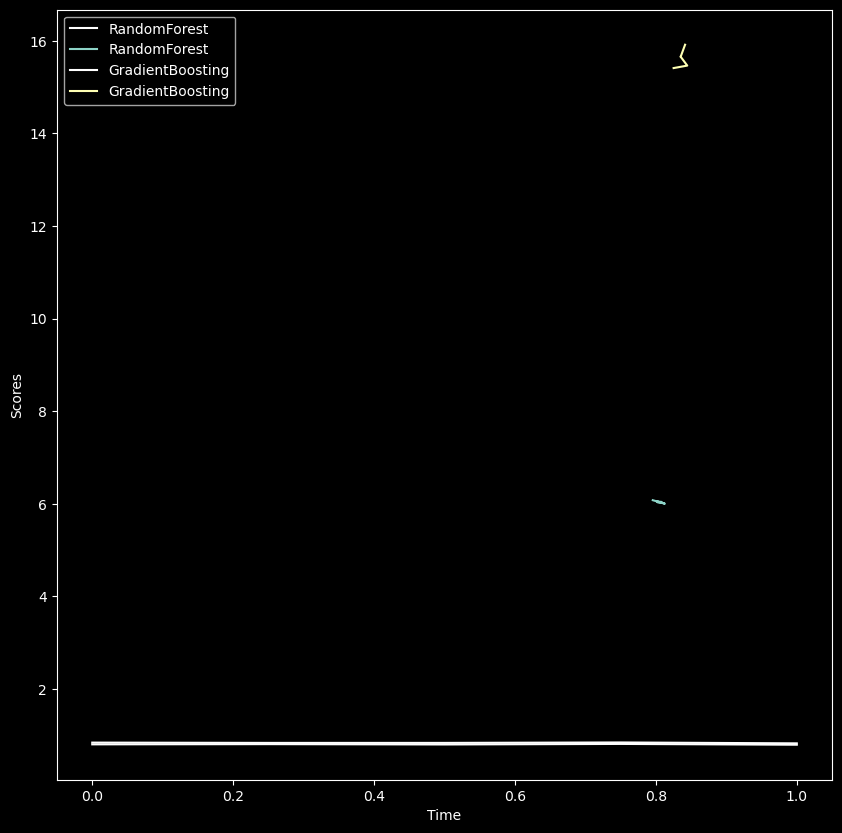

In [66]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
for (score_key, score_value), (time_key, time_value) in zip(scores.items(), times.items()):

    # have a linespace from 0 to 1 with the same length as the score_value

    ax.plot(np.linspace(0, 1, len(score_value)), score_value, label=score_key, c="white")

    ax.plot(score_value, time_value, label=score_key)
    ax.set_xlabel('Time')
    ax.set_ylabel('Scores')
    ax.legend()
plt.show()